In [12]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib.animation as animation
import scipy.misc
import cv2

from mas import GameEnv

env = GameEnv()
env.reset()

temp = env.render_env()

def resize(a, sc = 3):
        a = np.array(a)
        
        size_x = 31
        size_y = 11
        b = scipy.misc.imresize(a[:, :, 0], [sc * size_y, sc * size_x, 1], interp='nearest')
        c = scipy.misc.imresize(a[:, :, 1], [sc * size_y, sc * size_x, 1], interp='nearest')
        d = scipy.misc.imresize(a[:, :, 2], [sc * size_y, sc * size_x, 1], interp='nearest')

        a = np.stack([b, c, d], axis=2)
        return a


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
a = np.zeros((4,5,3))

14 8
(5, 5, 3) (13, 33, 3)
0 0
(5, 5, 3) (13, 33, 3)


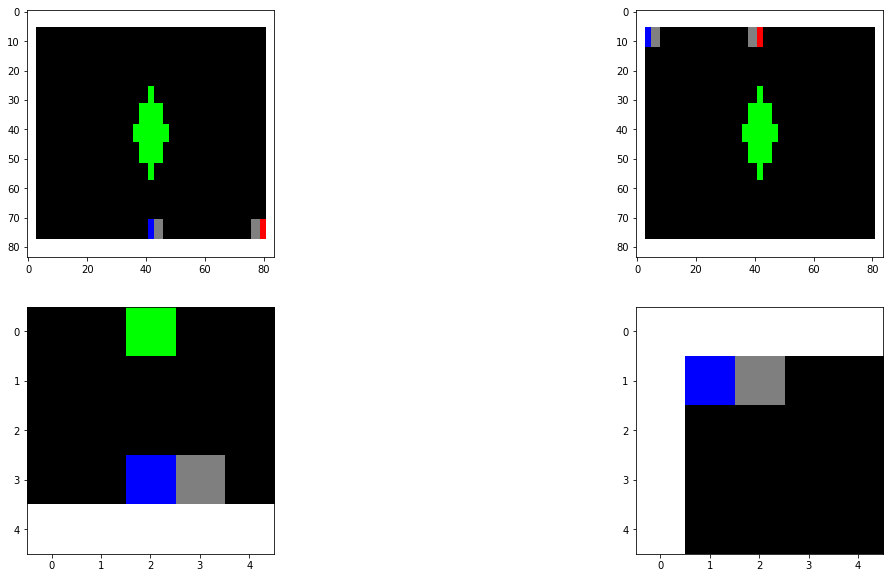

In [25]:
plt.figure(figsize=(20,10))
temp = env.train_render(1)
for i in range(5):
    env.move(1,0)
#env.getFrom(a)
plt.subplot(2,2,1)
plt.imshow(env.train_render(1))
plt.subplot(2,2,2)
plt.imshow(env.train_render(0))
plt.subplot(2,2,3)
plt.imshow(env.render_env_5x5(1))
plt.subplot(2,2,4)
plt.imshow(env.render_env_5x5(0))
#print(env.render_env_1d(0))
#len(env.render_env_1d(1)),
#print(env.render_env_1d(1))

In [18]:
a = env.getState()
a

[17, 5, 30, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 4]

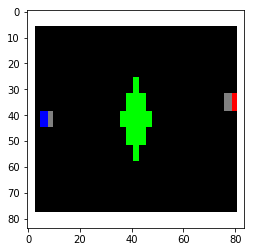

In [9]:
plt.imshow(env.train_render(0))

In [3]:
!ls ../../learning-to-communicate-pytorch/data.json


ls: cannot access ../../learning-to-communicate-pytorch/data.json: No such file or directory


In [4]:
import matplotlib.animation
from IPython.display import HTML
def showims( b=0, r=10, data=None):
        ac1 = {0: '->', 1: '<-', 2: '/\\', 3: '\\/',4:'',5:'',6:'',7:''}
        ac2 = {1: '->', 0: '<-', 3: '/\\', 2: '\\/',4:'',5:'',6:'',7:''}
        if data is not None:
            with open(data) as f:
                data = json.load(f)
            data1 = {u:r for u,r in data.items()}
            print({u:len(r) for u,r in data.items() if type(r) is list})
            #print(data.keys())
            data = np.array(data['eps'])#.transpose((0,2,3,1))
            if 'rewardT' in data1:
                print('total reward',data1['rewardT'])
        ims = []
        fig = plt.figure(figsize=(20,10))
        nr = 0
        r1=0;r2=0
        print(data.shape)
        for index in range(100 if data is None else min(300,len(data))):  
            if index < b and index>=b+r:
                continue
            if data is None:
                temp = env.train_render()
                action1 = np.random.randint(8)
                action2 = np.random.randint(8)

                r1, r2 = env.m

        # 0: forward, 1: backward, 2: left, 3: right
        # 4: trun lelf, 5:turn right, 6: beam, 7: stayove(action1, action2)
                if r1 or r2:
                    print( 'r1: ', r1, 'r2', r2, temp.shape)

                nr+=1
                if nr<b or nr>b+r:
                    continue
            else:
                if index == 0:
                    continue
                temp = resize(data[index-1])
            
            if data is not None and 'a' in data1:

                # 0: forward, 1: backward, 2: left, 3: right
                # 4: trun lelf, 5:turn right, 6: beam, 7: stay
                #print(data1['a'])
                #cv2.putText(img, text, org, fontFace, fontScale, color
                #[, thickness[, lineType[, bottomLeftOrigin]]]) 
                #print(len(data1))
                cv2.putText(temp, str(ac1[data1['a'][index][0]]), (5,12), 1, .5, 255,1)
                cv2.putText(temp, str(ac2[data1['a'][index][1]]), (70,12), 1, .5, 255,1)
                cv2.putText(temp, 'rB:'+str(data1['r'][index][0]), (5,20), 1, .5, 255,1)
                cv2.putText(temp, 'rR:'+str(data1['r'][index][1]), (70,20), 1, .5, 255,1)
                r1+=data1['r'][index][0];r2+=data1['r'][index][1]
                cv2.putText(temp, 'rT:'+str(r1), (5,5), 1, .5, 255,1)
                cv2.putText(temp, 'rT:'+str(r2), (70,5), 1, .5, 255,1)
                cv2.putText(temp, 'Total:'+str(r1+r2), (30,5), 1, .5, 255,1)
                if 'c' in data1:                    
                    cv2.putText(temp, 'C'+str(ac1[data1['c'][index][0]]), (5,30), 1, .5, 255,1)
                    cv2.putText(temp, 'C'+str(ac2[data1['c'][index][1]]), (70,30), 1, .5, 255,1)
           
            im = plt.imshow(temp, animated=True)
                        
            if False:
                cv2.putText(img1,"info", (0,50), cv2.FONT_HERSHEY_DUPLEX, 1, 50,2)
                cv2.line(img1,(0,int(row['plines'][0])), (1300,int(row['plines'][0])) ,(0, 0, 0),4)
            
            ims.append([im])            

        ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=200)
        #Writer = animation.writers['ffmpeg']
        #writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
        #ani.save('im.mp4', writer=writer)
        plt.close()

        return HTML(ani.to_jshtml())
matplotlib.rcParams['animation.embed_limit'] = 2**128
#showims(b=0, r=30, data='../../learning-to-communicate-pytorch/data.json')

In [8]:
with open('logs1/acktrv1/ep:300.json') as f:
                data = json.load(f)

In [9]:
np.array(data['eps']).shape

(100, 11, 31, 3)

In [5]:
showims(b=0, r=30, data='logs1/pbtacshared2dcommEnAlphav10/ep:4000.json')

{'eps': 100, 'a': 100, 'r': 100, 'co': 100, 'ac': 100}
total reward 118
(100, 13, 33, 3)


/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [14]:
showims(b=0, r=30, data='logs1/acentrdecreasetwov1/ep:9450.json')

{'eps': 100, 'a': 100, 'r': 100}
total reward 83
(100, 13, 33, 3)


/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [9]:
showims(b=0, r=30, data='logs1/a2cv1/ep:1850.json')

{'eps': 100, 'a': 100, 'r': 100, 'c': 100}
total reward 53
(100, 11, 31, 3)


/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [10]:
#!ls test\ pytorch/logs1/
showims(b=0, r=30, data='logs1/acv5/ep:450.json')

{'eps': 100, 'a': 100, 'r': 100}
total reward 6
(100, 11, 31, 3)


/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [ ]:
!ls logs1/test
showims(b=0, r=30, data='logs1/twoSepPv10/ep:9950.json')

In [5]:

showims(b=0, r=30, data='logs1/twoSepPCommv7/ep:11100.json')

total reward 120


/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/share/apps2/anaconda/anaconda3/latest/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


ls: cannot access ../../learning-to-communicate-pytorch/logs/: No such file or directory


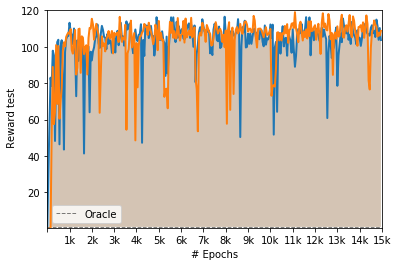

In [3]:
import argparse, glob, fnmatch, os, csv, json, re, pandas
from pathlib import Path

def file_index_key(f):
	pattern = r'\d+$'
	key_match = re.findall(pattern, Path(f).stem)
	if len(key_match):
		return int(key_match[0])
	return f


!ls ../../learning-to-communicate-pytorch/logs/
#twoDifPov1, twoSepPCommv3
results_path =['logs1/twoSepPCommv4','logs1/twoSepPCommv5','logs1/twoDifPov1']# ['../../test pytorch/logs/simplev4']
results_path = ['logs1/twoPGreplayv1','logs1/twoSepPv10','logs1/twoSepPCommv6']
results_path = ['logs1/twoSepPv11','logs1/twoSepPCommv7']#alpha 0.9

def showP(results_path):
	prefix = ['']
	label = [None]
	if len(prefix) != len(results_path):
		prefix = prefix * len(results_path)

	label = label
	if len(label) != len(results_path):
		label = label * len(results_path)

	max_epoch = 0
	for prefix, results_path, label in zip(prefix, results_path, label):
		pattern = '{}*.csv'.format(prefix)
		if not os.path.isdir(results_path):continue
		filenames = fnmatch.filter(os.listdir(results_path), pattern)
		filenames.sort(key=file_index_key)

		epoch_to_rewards = {} # epochs x trials
		nfiles = 0#;print(filenames) #; filenames = [results_path]
		for i, f in enumerate(filenames):

			f_in = open(os.path.join(results_path, f), 'r')
			meta = f_in.readline()
			reader = csv.reader(f_in)
			headers = next(reader, None)
			if headers != ['episode', 'reward']:
				raise ValueError('result is malformed')

			for row in reader:
				row_dict = dict(zip(headers, row))
				e = int(row_dict['episode'])
				rewards = epoch_to_rewards.get(e, [])
				r = float(re.findall(r'[-+]?\d*\.\d+|\d+', row_dict['reward'])[0])
				rewards.append(r)
				if len(rewards) == 1 or True:
					epoch_to_rewards[e] = rewards

			nfiles += 1#; print(rewards)

		epochs = np.array(sorted([int(k) for k in epoch_to_rewards.keys()]))#;print(epoch_to_rewards)
		max_epoch = max(max([int(k) for k in epoch_to_rewards]), max_epoch)
		nfiles = min([len(epoch_to_rewards[k]) for k in epoch_to_rewards])
		rewards_ewma = np.zeros((epochs.shape[0], nfiles))
		rewards_avg = np.zeros(len(epochs))
		rewards_std = np.zeros(len(epochs))

		for i, e in enumerate(epochs):
			rewards_ewma[i, :] = epoch_to_rewards[e][:nfiles]

		for j in range(rewards_ewma.shape[1]):
			df = pandas.DataFrame(rewards_ewma[:, j])
			rewards_ewma[:, j] = np.array(df.ewm(alpha=0.9).mean()).squeeze()

		for e in enumerate(epochs):
			rewards_avg = rewards_ewma.mean(1)
			rewards_std = rewards_ewma.std(1)

		plt.plot(epochs, rewards_avg, linewidth=2, label=label)
		plt.fill_between(epochs, rewards_avg - rewards_std, 
			np.minimum(rewards_avg + rewards_std, 1), alpha=0.25)
	
	threshold_x = np.linspace(0, max_epoch, 2)
	plt.plot(threshold_x, np.ones(threshold_x.shape), 
		zorder=1, color='k', linestyle='dashed', linewidth=1, alpha=0.5, label='Oracle')
	plt.axis([0, max_epoch, 0.5, 1+np.amax(rewards_avg)])
	plt.legend(loc='best')
	plt.ylabel(' Reward test')
	plt.xlabel('# Epochs')
	xtick_values = range(0, max_epoch + 1000, 1000)
	xtick_labels = ['{}k'.format(int(x/1000)) for x in xtick_values]
	xtick_labels[0] = ''
	plt.xticks(xtick_values, xtick_labels)
	ax = plt.gca()
	plt.show()
showP(results_path)

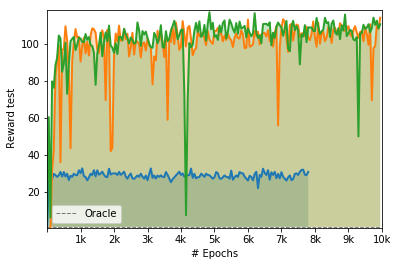

In [8]:
results_path = ['logs1/twoPGreplayv1','logs1/twoSepPv10','logs1/twoSepPCommv6']
showP(results_path)

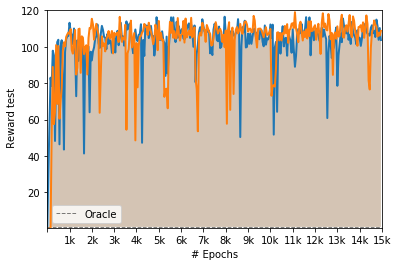

In [12]:
results_path = ['logs1/twoSepPv11','logs1/twoSepPCommv7']
showP(results_path)

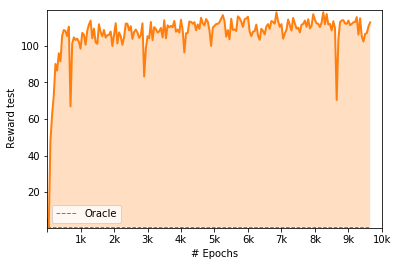

In [ ]:
from IPython import display
import time#import pylab as pl
while True:
    try:
        results_path = ['logs1/twoSepPv12','logs1/twoSepPCommv8']
        showP(results_path)
        display.clear_output(wait=True)
        #display.display(plt.gcf())
        time.sleep(10.0)
    except KeyboardInterrupt:
        break

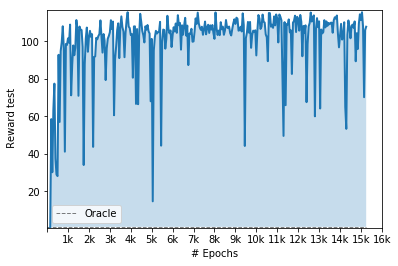

In [12]:
#!ls logs1/dqnsharedv1/
results_path = ['logs1/dqnsharedv1']
showP(results_path)